### lab-2 visualizaton

Мисюрина Ирина

датасет Diamonds https://www.kaggle.com/datasets/joebeachcapital/diamonds

In [1]:
!wget https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv

--2024-03-24 12:32:35--  https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2772143 (2.6M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   2.64M  --.-KB/s    in 0.04s   

2024-03-24 12:32:35 (68.1 MB/s) - ‘diamonds.csv’ saved [2772143/2772143]



In [2]:
import pandas as pd

##### 1 Считать в pandas.DataFrame любой источник данных

In [3]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### 2 Привести описание датасета

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|carat|масса|карат|
|cut|огранка|категория (средняя, хорошая, очень хорошая, премиум, идеальная)
|color|цвет|категория|
|clarity|прозрачность|категория|
|depth|высота|мм|
|table|ширина|мм|
|price|цена|у.е. (скорее всего доллары)|
|x|геометрия по оси x|мм|
|y|геометрия по оси y|мм|
|z|геометрия по оси z|мм|

##### 3 `matplotlib`:  
   - Построить несколько графиков разного вида с использованием `matplotlib`.  
   - Построить несколько суб-графиков на одном графике используя `.subplot`.  
   - Построить интерактивный график со слайдером.
   
   > - Графики должны быть разных видов.  
   > - Хотя бы в одном графике необходимо подписать оси.  
   > - Во всех графиках необходимо указать название.
   > - Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

In [4]:
from matplotlib import pyplot as plt

Гистограмма распределения средней стоимости в зависимости от clarity

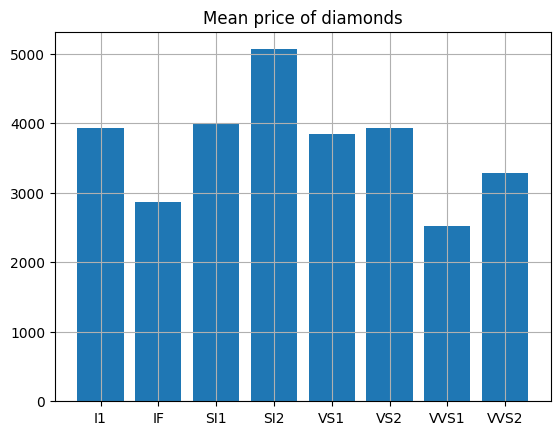

In [5]:
bar_df = df.groupby('clarity', as_index=False).agg({'price': 'mean'})
plt.bar(x=bar_df['clarity'], height=bar_df['price'])
plt.title('Mean price of diamonds')
plt.grid()

Построим график зависимости среднего table от depth

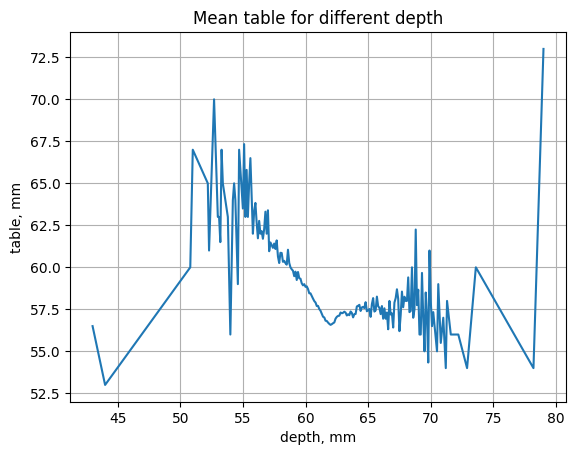

In [6]:
plot_df = df.groupby('depth', as_index=False).agg({'table': 'mean'})
plt.plot(plot_df['depth'], plot_df['table'])
plt.title('Mean table for different depth')
plt.xlabel('depth, mm')
plt.ylabel('table, mm')
plt.grid()

Построим серию графиков mean table от depth в clarity

In [7]:
new_df = df.groupby(['clarity', 'depth'], as_index=False).agg({'table': 'mean'})
new_df.head()

,clarity,depth,table
0,I1,55.6,62.0
1,I1,55.8,62.0
2,I1,55.9,64.0
3,I1,56.1,62.5
4,I1,56.5,57.0


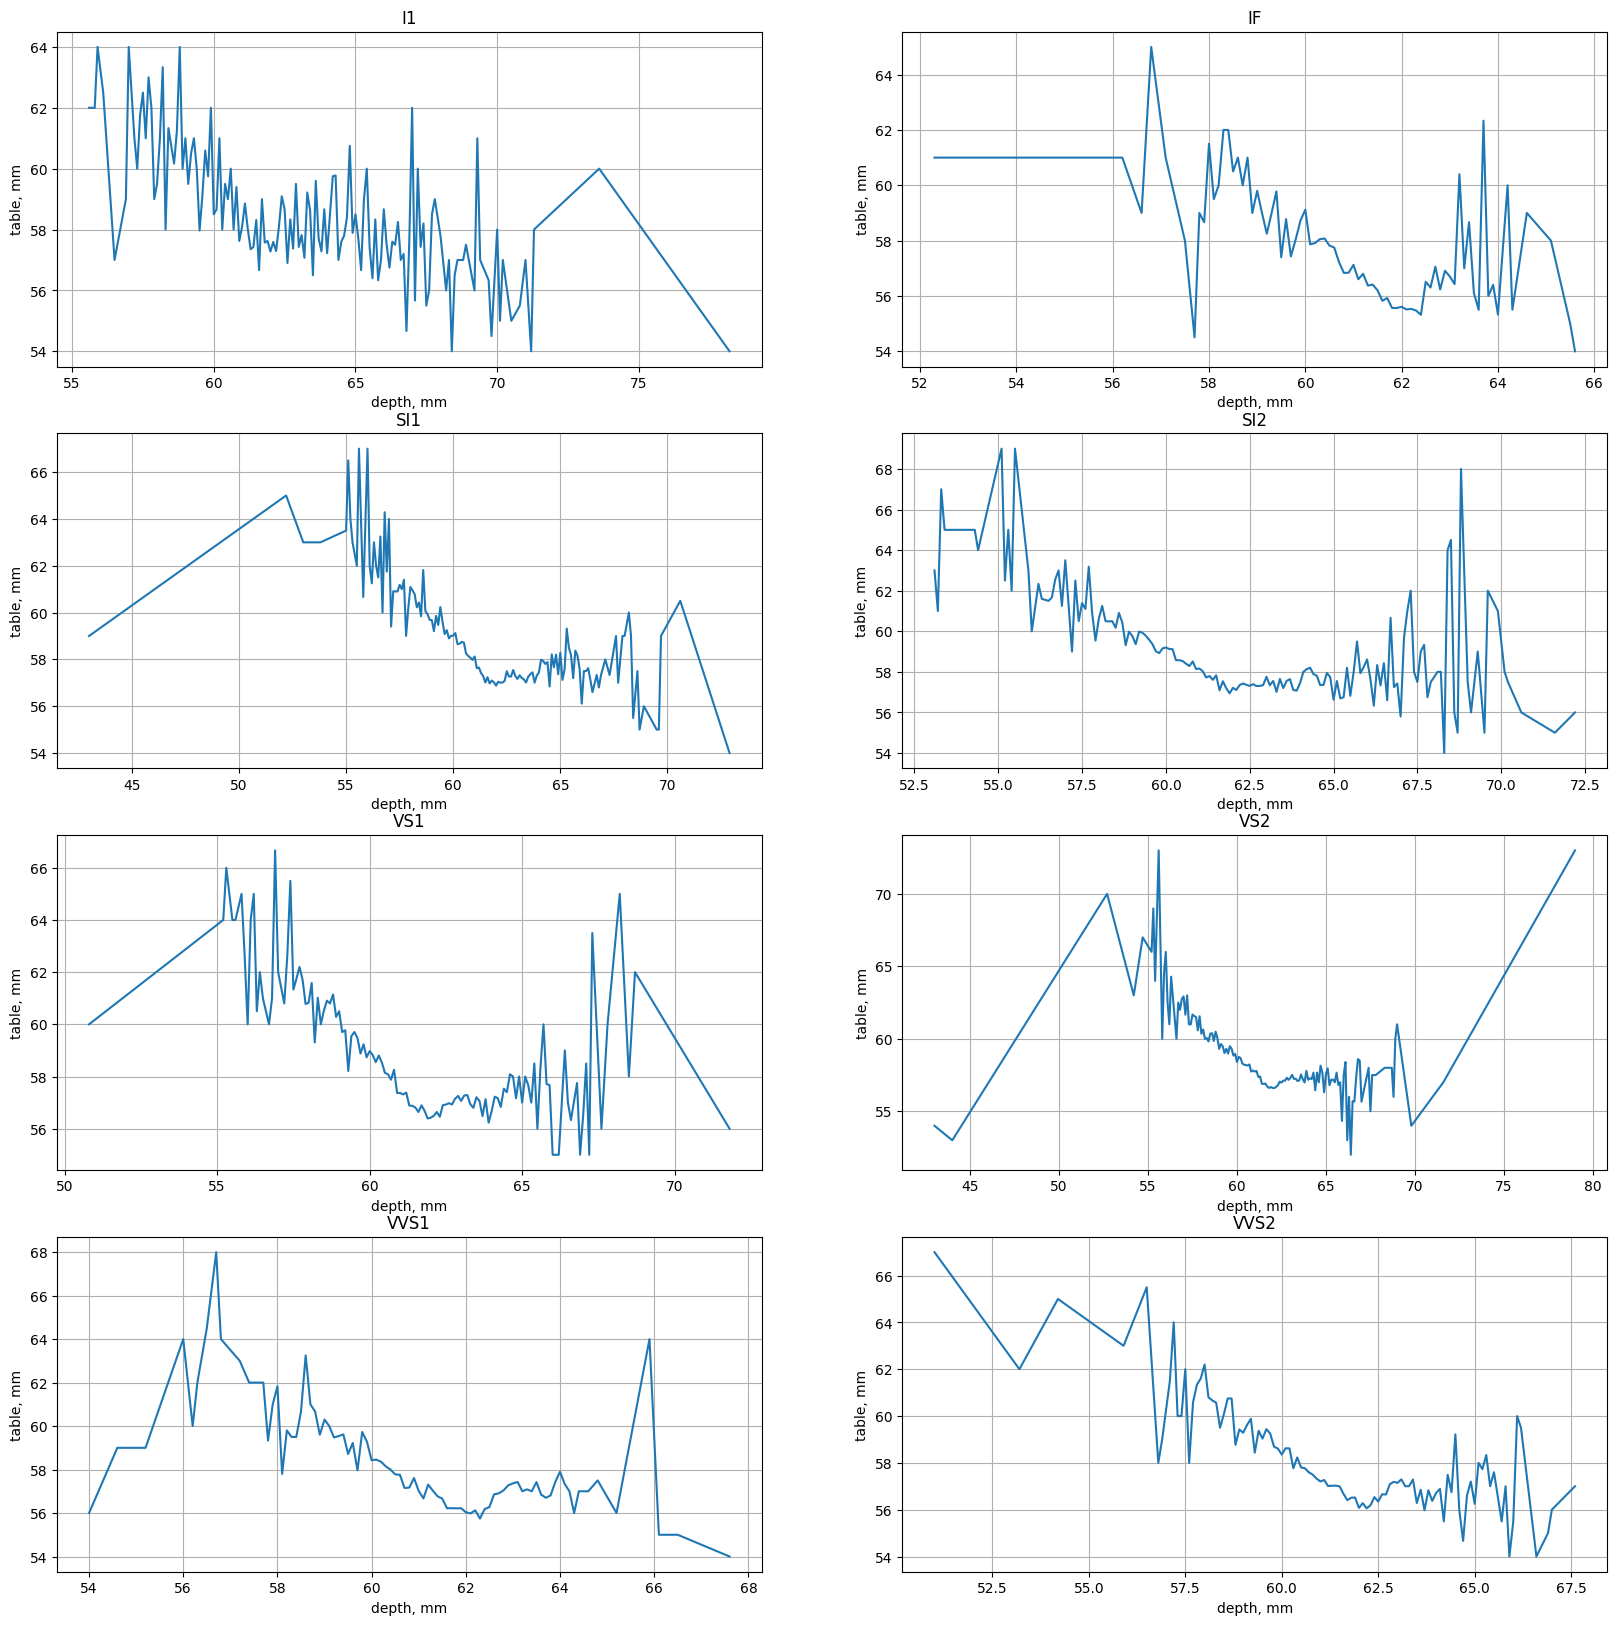

In [8]:
plt.figure(figsize=(20, 20))

types = new_df['clarity'].unique()

for i in range(types.shape[0]):
    sp = plt.subplot(4, 2, i+1)
    subdf = new_df[new_df['clarity'] == types[i]]
    plt.plot(subdf['depth'], subdf['table'])
    sp.set_title(types[i])
    sp.set_xlabel('depth, mm')
    sp.set_ylabel('table, mm')
    sp.grid()

Создадим интерактивный график: наложим предыдущие графики

In [31]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:00


0

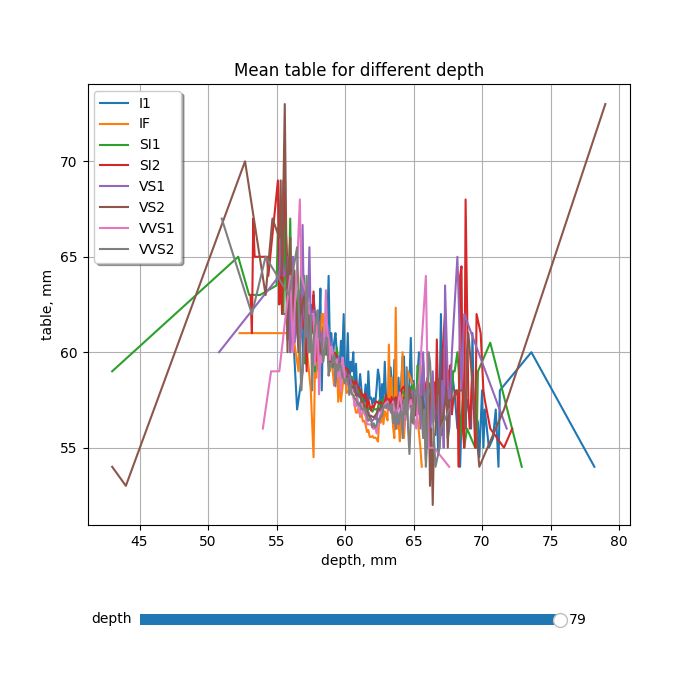

In [32]:
%matplotlib inline
%matplotlib widget

from google.colab import output
output.enable_custom_widget_manager()

from matplotlib.widgets import Slider

types = new_df['clarity'].unique()

f, ax = plt.subplots(figsize=(7, 7))

for i in range(types.shape[0]):
    subdf = new_df[new_df['clarity'] == types[i]]
    ax.plot(subdf['depth'], subdf['table'], label=types[i])

plt.title('Mean table for different depth')
plt.xlabel('depth, mm')
plt.ylabel('table, mm')
plt.grid()

leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)

f.subplots_adjust(bottom=0.25)

ax_d = f.add_axes([0.20, 0.1, 0.60, 0.03])
d_slider = Slider(
    ax=ax_d,
    label='depth',
    valmin=new_df['depth'].min(),
    valmax=new_df['depth'].max(),
    valinit=new_df['depth'].max(),
    valstep = 0.1,
)

lines = ax.get_lines()
lined = {}
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(7)
    lined[legline] = origline

def update(val):
    ax.clear()
    d = d_slider.val
    for i in range(types.shape[0]):
        subdf = new_df[(new_df['clarity'] == types[i]) & (new_df['depth'] <= d)]
        ax.plot(subdf['depth'], subdf['table'], label=types[i])
    leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)
    ax.set_xlabel('depth, mm')
    ax.set_ylabel('table, mm')
    ax.set_title('Mean table for different depth')
    ax.grid()

    lines = ax.get_lines()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)
        lined[legline] = origline

    f.canvas.draw_idle()

def on_pick(event):
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    legline.set_alpha(1.0 if visible else 0.2)
    f.canvas.draw()

f.canvas.mpl_connect('pick_event', on_pick)
d_slider.on_changed(update)

##### 4 `pandas`:  
   - Построить три разных вида графиков с использованием `pandas.DataFrame.plot` / `Series.plot`.  
   
   > - Среди графиков должен присутствовать один `boxplot` (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).  
   > - Графики должны быть построены как через методы `DataFrame`, так и через методы `Series`. То есть оба варианта нужно продемонстрировать.

<span style="color:red">! WARN если графики пандаса лагают - сделать ресет среды и не запускать интерактивный график</span>

Boxplot price в разрезе clarity

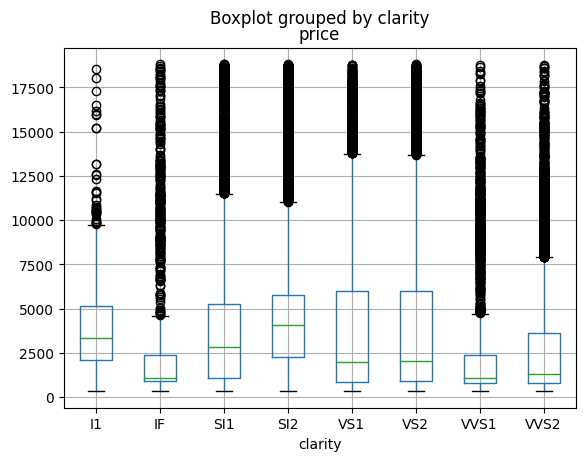

In [9]:
df.boxplot(by='clarity', column='price')
plt.show()

С помощью Series отрисуем общий boxplot для price

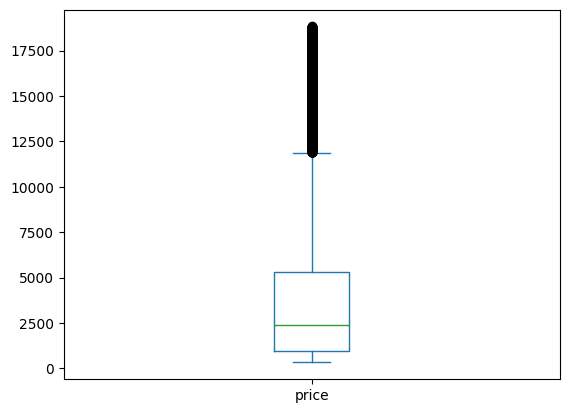

In [10]:
s = df['price']
plt.clf()
plt.close()
s.plot(kind='box')
plt.show()

Гистограмма price от clarity

array([[<Axes: title={'center': 'I1'}>, <Axes: title={'center': 'IF'}>,
        <Axes: title={'center': 'SI1'}>],
       [<Axes: title={'center': 'SI2'}>, <Axes: title={'center': 'VS1'}>,
        <Axes: title={'center': 'VS2'}>],
       [<Axes: title={'center': 'VVS1'}>,
        <Axes: title={'center': 'VVS2'}>, <Axes: >]], dtype=object)

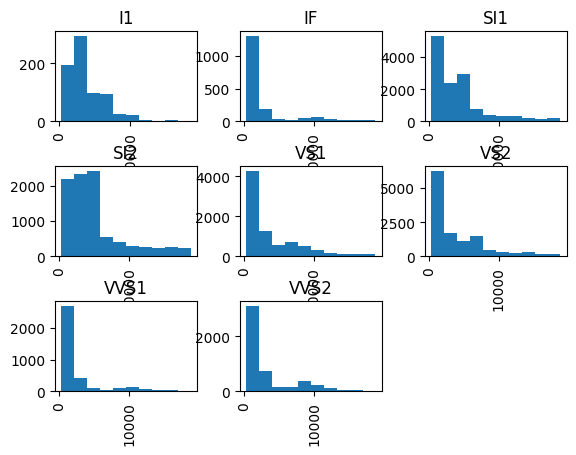

In [11]:
df.hist(column='price', by=['clarity'])

Через Series построим общую гистограмму price

<Axes: >

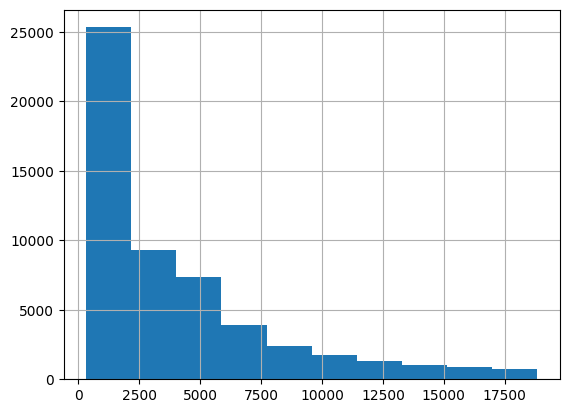

In [12]:
df['price'].hist()

Построим круговую диаграмму распределения clarity

<Axes: ylabel='clarity'>

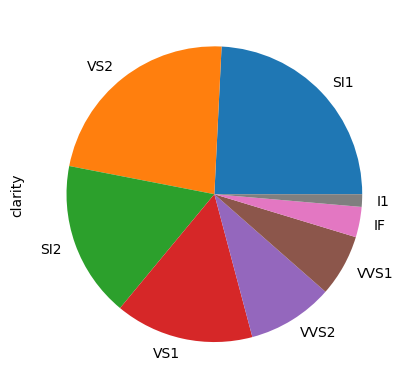

In [13]:
df['clarity'].value_counts().plot(kind='pie')

##### 5 `seaborn`:  
   - Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.  
   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.  
   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  
   - Построить график `.heatmap` попарной корреляции всех числовых признаков.  
   
     > Категориальные признаки необходимо убрать из датафрейма перед построением.  

In [14]:
import seaborn as sns

In [15]:
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_columns = ['clarity', 'color', 'cut']

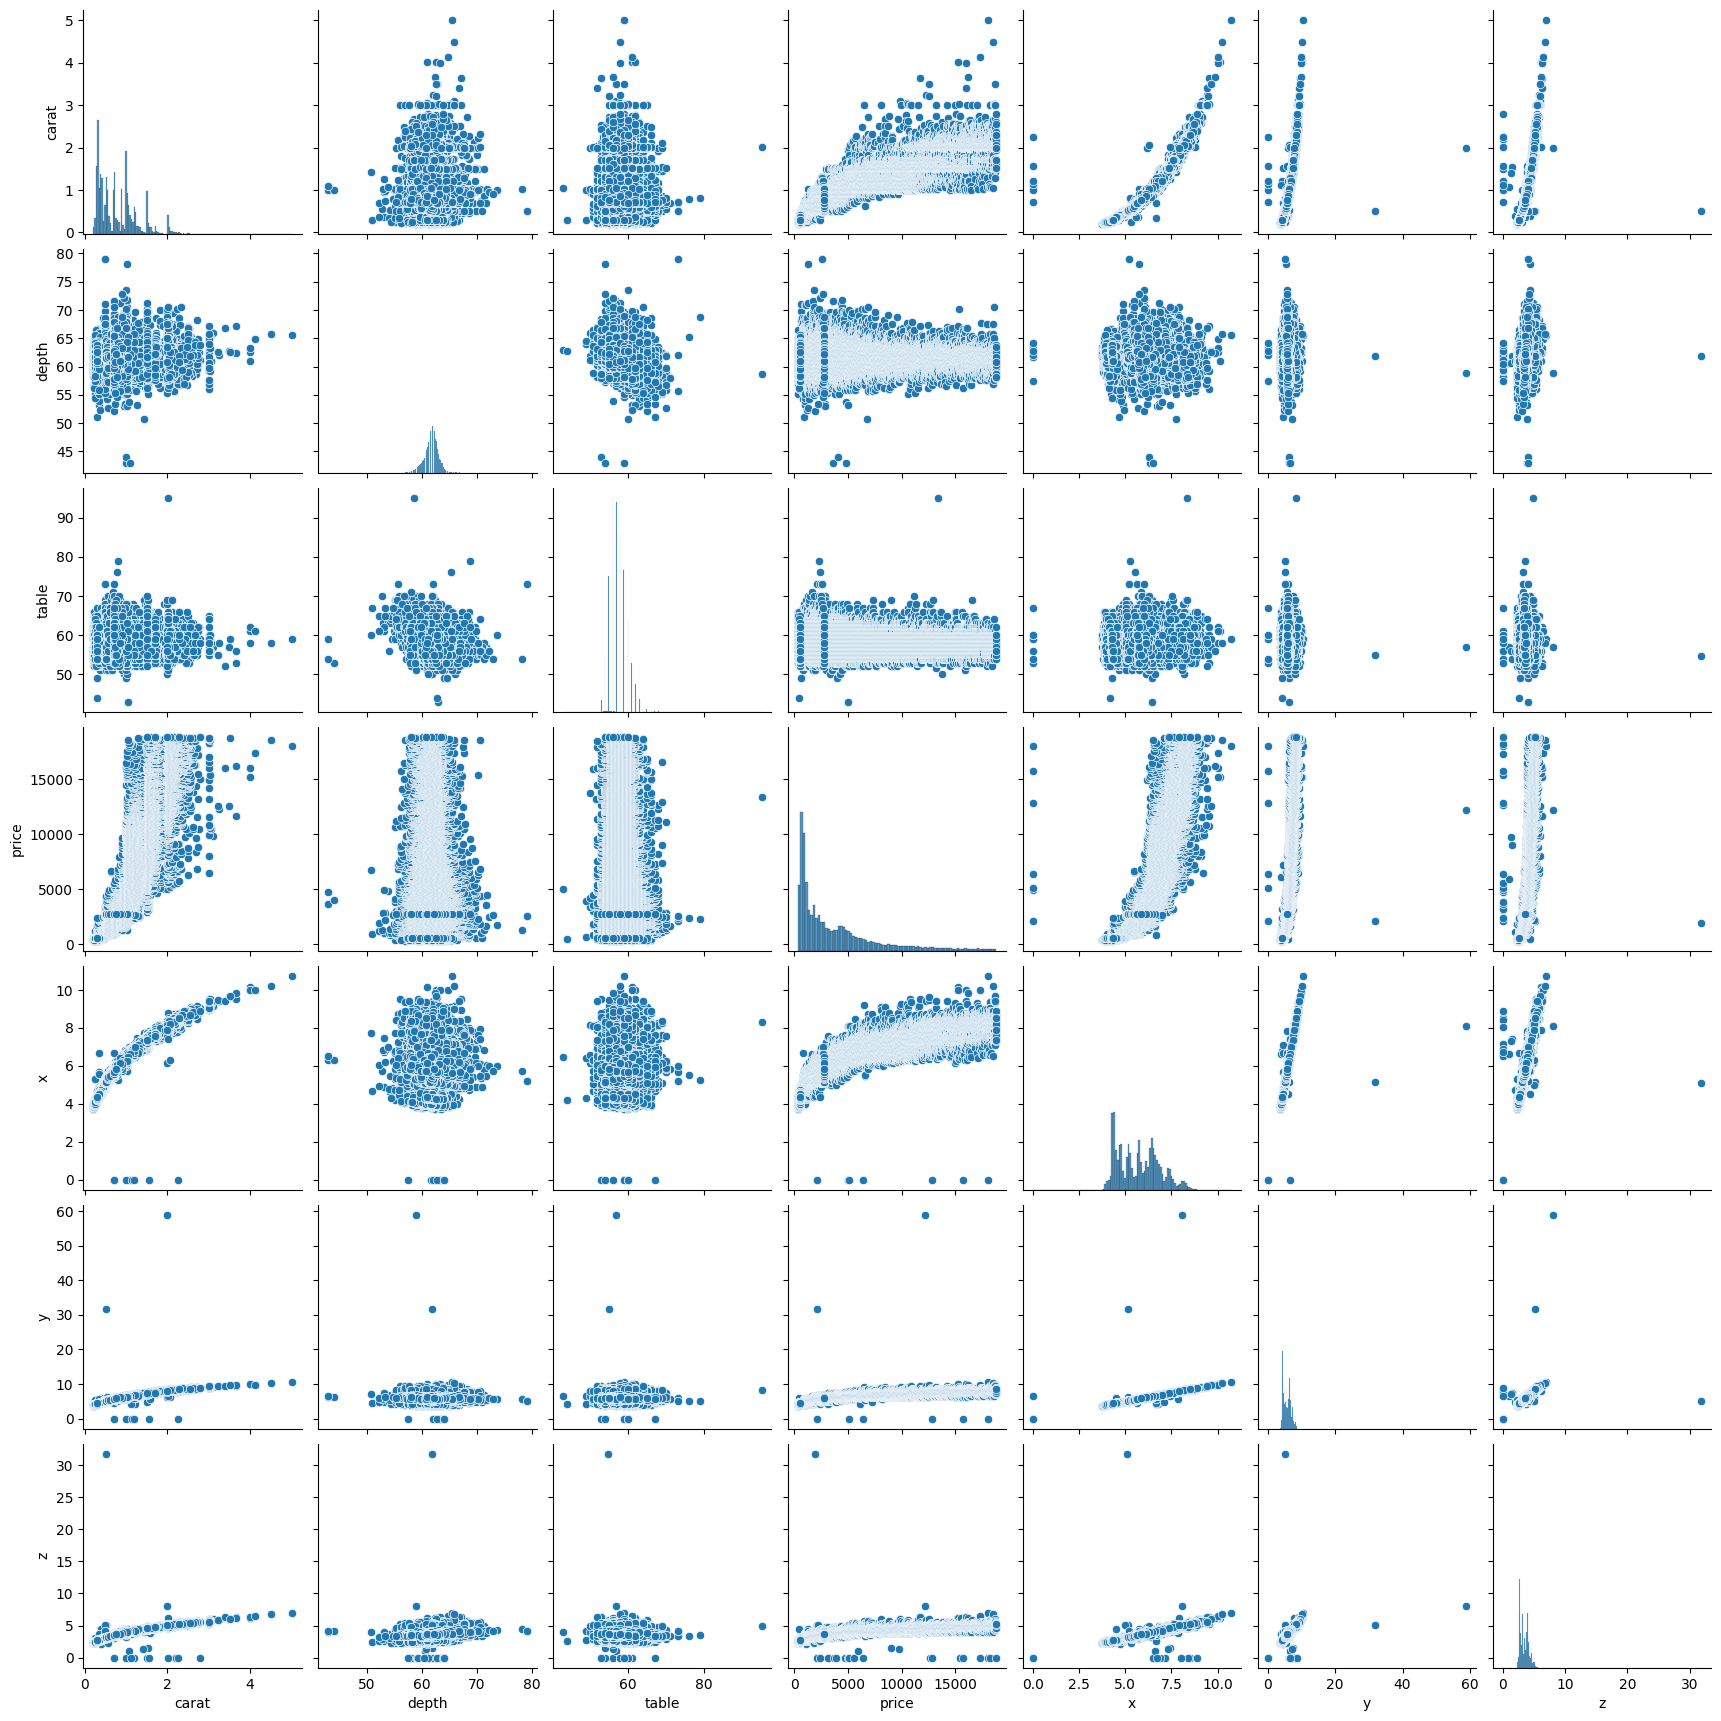

In [16]:
sns.pairplot(df[numeric_columns])

   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.

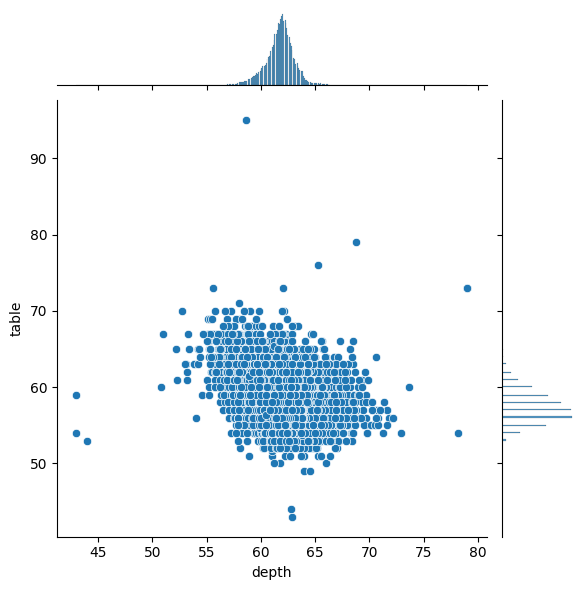

In [17]:
sns.jointplot(data=df, x='depth', y='table')

   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  

<Axes: xlabel='cut', ylabel='table'>

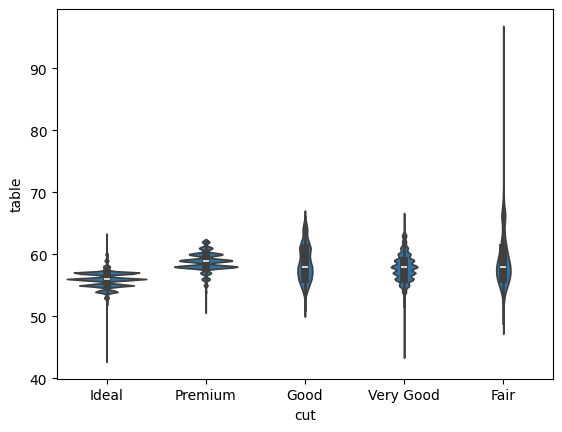

In [18]:
sns.violinplot(data=df, x='cut', y='table')

<Axes: xlabel='cut', ylabel='table'>

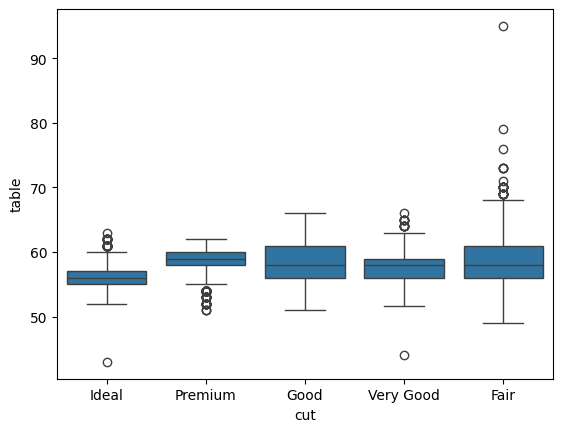

In [19]:
sns.boxplot(data=df, x='cut', y='table')

   - Построить график `.heatmap` попарной корреляции всех числовых признаков.

<Axes: >

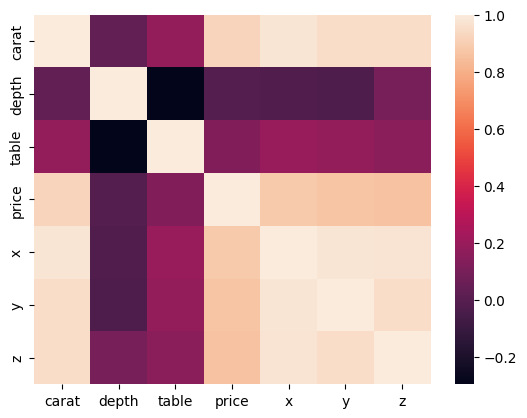

In [20]:
sns.heatmap(data=df[numeric_columns].corr())

#### 6 `scipy.stats`:  
   - Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.  

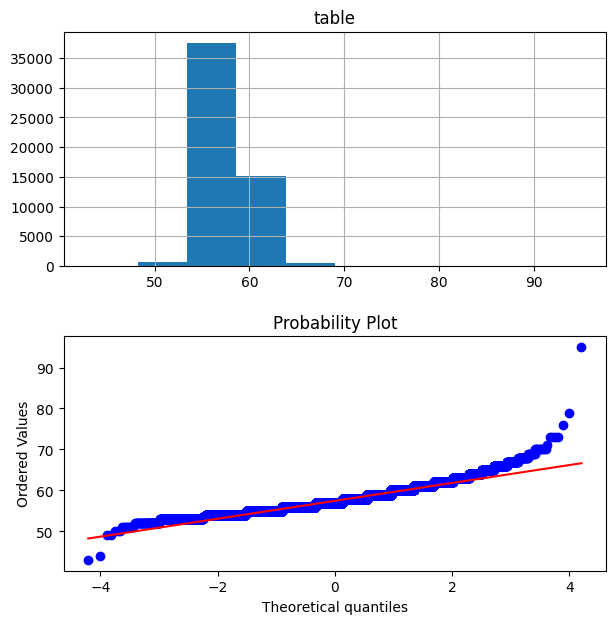

In [21]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(7, 7))
stats.probplot(df['table'], dist="norm", plot=plt)
plt.subplot(2, 1, 2)
df.hist(ax=ax_p[0], column='table')
plt.show()

##### 7 `plotly`:  
   - Построить несколько графиков разного вида.  
   - Построить несколько суб-графиков на одном графике.  
   - Построить интерактивный график.  
   
     > Использование `Dash` опционально.

In [25]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

Нарисуем те же графики, что и в задании с matplotlib

In [27]:
fig = px.histogram(bar_df, x="clarity", y='price')
fig.show(renderer="colab")

In [28]:
fig = px.line(plot_df, 'depth', 'table')
fig.show(renderer="colab")

In [29]:
types = new_df['clarity'].unique()

fig = make_subplots(rows=4, cols=2, subplot_titles=types)

for i in range(4):
    for j in range(2):
        subdf = new_df[new_df['clarity'] == types[2*i+j]]
        fig.add_trace(go.Line(x=subdf['depth'], y=subdf['table']), row=i+1, col=j+1)

fig.show(renderer="colab")

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [30]:
fig = go.Figure()

for i in range(types.shape[0]):
    subdf = new_df[new_df['clarity'] == types[i]]
    fig.add_trace(go.Scatter(x=subdf['depth'], y=subdf['table'], name = types[i]))

fig.update_layout(
    title_text='Mean table for different depth',
    title_x=0.5,
    legend_title='clarity',
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True
        ),
        type = 'linear'
    ),
    autosize=False,
    width=1300,
    height=800,
)

fig.show(renderer="colab")